In [1]:
import sys
sys.path.append('../src')

from module.module import Linear
from module.activation import TanH, Sigmoide, ReLU

from loss.loss import BCELoss
from networks.optim import Optim
from networks.sequentiel import Sequentiel

from utils.plots import plot_net, visualization, plot_usps_predictions

from sklearn.cluster import KMeans

import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
data = pkl.load(open("../data/usps.pkl",'rb')) 

In [3]:
X_train = data["X_train"]
y_train = data["Y_train"]

X_test = data["X_test"]
y_test = data["Y_test"]

In [13]:
params = [    
    {"init": "uniform", "batch_size": 40},
    {"init": "uniform", "batch_size": 10},
    
    {"init": "xavier", "batch_size": 10},
    {"init": "he", "batch_size": 20},
]

optims = []

input_neurons = 256
h1 = 100
h2 = 10

for param in params:
    
    np.random.seed(42)
    
    init = param["init"]
    batch_size = param["batch_size"]

    encoder = [
        Linear(input_neurons, h1, bias=True, init=init),
        TanH(),
        Linear(h1, h2, bias=True, init=init),
        TanH(),
    ]

    decoder = [
        Linear(h2, h1, bias=True, init=init),
        TanH(),
        Linear(h1, input_neurons, bias=True, init=init),
        Sigmoide()
    ]

    net = Sequentiel([*encoder, *decoder])

    optim = Optim(net, BCELoss(), eps=1e-3)
    optim.SGD(X_train, X_train, test_train_split=True, batch_size=batch_size, epochs=150, verbose=False)

    optims.append(optim)

100%|██████████| 150/150 [01:12<00:00,  2.06it/s]


Training completed.


100%|██████████| 150/150 [01:13<00:00,  2.05it/s]


Training completed.


100%|██████████| 150/150 [01:13<00:00,  2.04it/s]


Training completed.


100%|██████████| 150/150 [01:26<00:00,  1.74it/s]

Training completed.


In [34]:
def plot_usps_predictions(X, indices, originale=True, title=""):
    img_title = "Image reconstruite"
    if originale:
        img_title = "Image originale"

    num_images = len(indices)
    figsize = (15, 3)
    
    fig, axs = plt.subplots(nrows=1, ncols=num_images, figsize=figsize)
    plt.subplots_adjust(top=1)
    fig.suptitle(title)

    for i, idx in enumerate(indices):
        axs[i].imshow(X[idx].reshape((16, 16)))
        axs[i].set_title(f"{img_title} {idx}", y=-0.2)
        axs[i].axis("off")

    fig.tight_layout()
    plt.show()

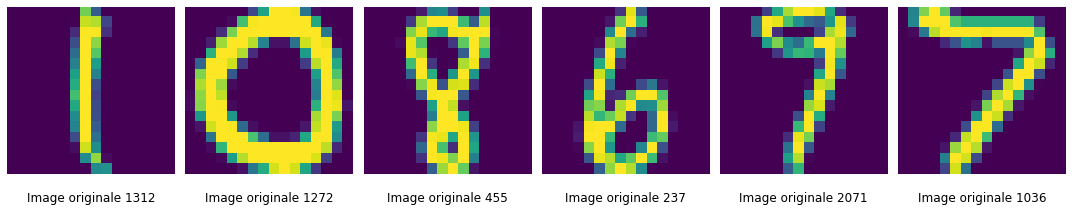

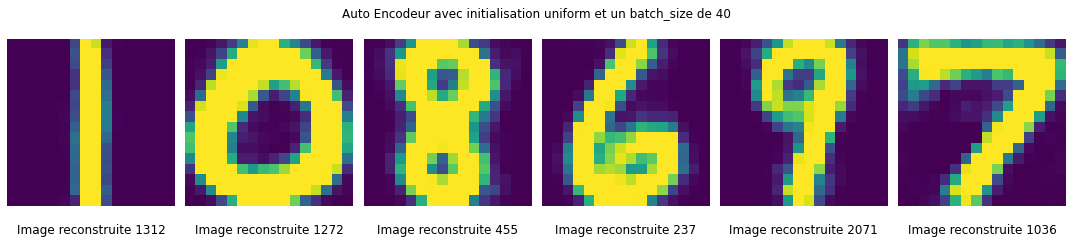

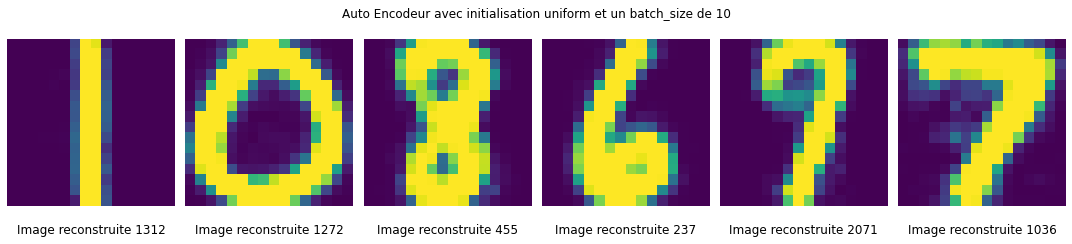

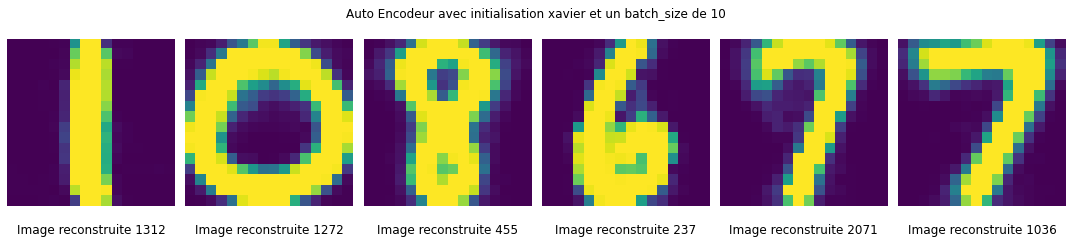

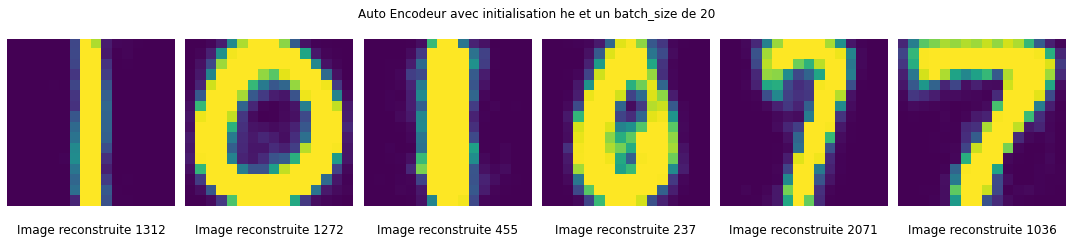

In [35]:
classes = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 6, replace=False)

indices = []

for cl in classes:
    y_c = np.where(y_test == cl)[0]
    indices.extend(list(np.random.choice(y_c, 1)))
    
plot_usps_predictions(X_test, indices)


for param, optim in zip(params, optims):
    net = optim.net

    Xhat = net(X_test)
    plot_usps_predictions(Xhat, indices, originale=False, title=f"Auto Encodeur avec initialisation {param['init']} et un batch_size de {param['batch_size']}")

In [ ]:
input_neurons = 256
h1 = 100
h2 = 10

init = "xavier"
batch_size = 10

encoder = [
    Linear(input_neurons, h1, bias=True, init=init),
    TanH(),
    Linear(h1, h2, bias=True, init=init),
    TanH(),
]

decoder = [
    Linear(h2, h1, bias=True, init=init),
    TanH(),
    Linear(h1, input_neurons, bias=True, init=init),
    Sigmoide()
]

net = Sequentiel([*encoder, *decoder])

optim = Optim(net, BCELoss(), eps=1e-3)
optim.SGD(X_train, X_train, test_train_split=True, batch_size=batch_size, epochs=150, verbose=False)

In [6]:
# encoder_net = Sequentiel(encoder)
# x_encoder = encoder_net(X_train)

# kmeans = KMeans(n_clusters=10, random_state=0)

# labels = kmeans.fit_predict(x_encoder)

# Xhat = net(X_train)
# visualization(X_train, Xhat, y_train, type_affichage="pca", n_components=2)
# visualization(X_train, Xhat, y_train, type_affichage="pca", n_components=3)